In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df= sns.load_dataset("penguins")

In [7]:
print(df.shape)
print(df.info())
print(df.head(5))
print(df.isnull().sum())

(344, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen       

In [8]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [9]:
df = df.dropna()
print("Missing Values after cleaning:\n", df.isnull().sum())

Missing Values after cleaning:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [10]:
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

In [11]:
avg_mass = df.groupby('species')['body_mass_g'].mean()
print("\nAverage Body Mass by Species:\n", avg_mass)


Average Body Mass by Species:
 species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: body_mass_g, dtype: float64


C:\Users\SANJANA\AppData\Local\Temp\ipykernel_26672\331747266.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_mass = df.groupby('species')['body_mass_g'].mean()


In [12]:
df['bill_length_norm'] = (df['bill_length_mm'] - np.min(df['bill_length_mm'])) / (np.max(df['bill_length_mm']) - np.min(df['bill_length_mm']))
print(df[['bill_length_mm','bill_length_norm']].head())

   bill_length_mm  bill_length_norm
0            39.1          0.254545
1            39.5          0.269091
2            40.3          0.298182
4            36.7          0.167273
5            39.3          0.261818


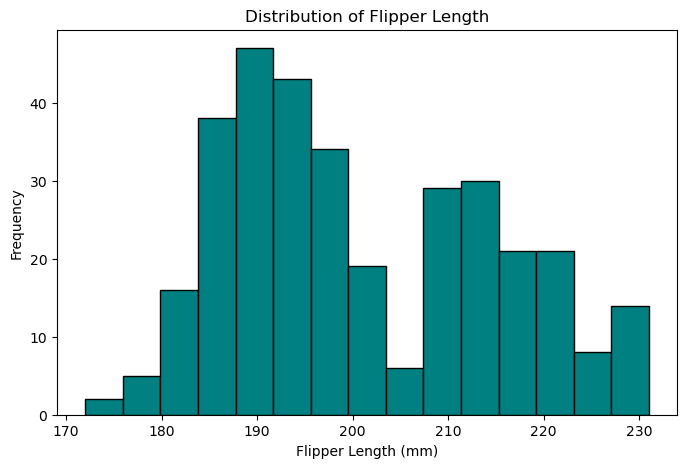

In [13]:
plt.figure(figsize=(8,5))
plt.hist(df['flipper_length_mm'], bins=15, color='teal', edgecolor='black')
plt.title("Distribution of Flipper Length")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Frequency")
plt.show()

C:\Users\SANJANA\AppData\Local\Temp\ipykernel_26672\1260689498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='island', data=df, order=df['island'].value_counts().index, palette='pastel')


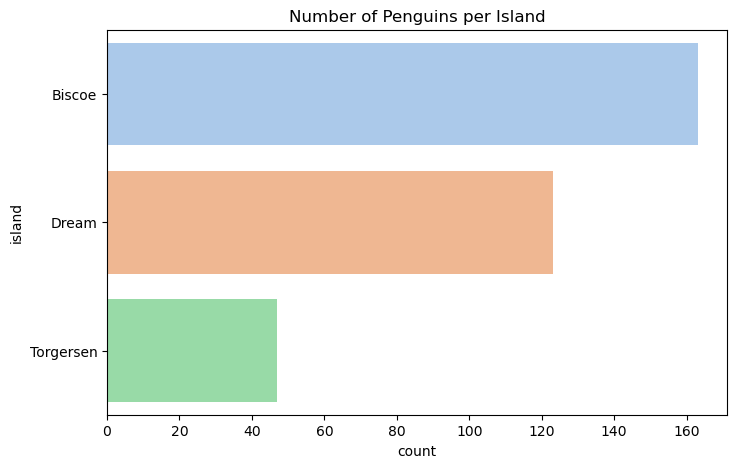

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(y='island', data=df, order=df['island'].value_counts().index, palette='pastel')
plt.title("Number of Penguins per Island")
plt.show()

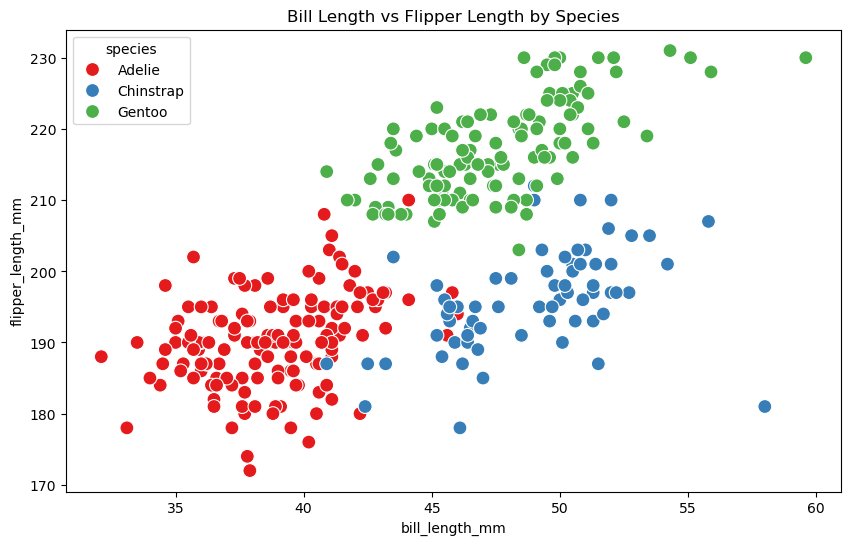

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='species', data=df, s=100, palette='Set1')
plt.title("Bill Length vs Flipper Length by Species")
plt.show()